In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def init_df(n):
    columns = ['fname', 'n', 't_opt','t','eval_opt','eval','c0','c1','c2','c3','iter_danger','neigh','popsize','niter','seed','y']
    for i in range(n):
        columns += ['x'+str(i)]
    #print(columns)
    return pd.DataFrame(columns=columns)
def proc_line(df, line, fname, n):
    s = line.split('|')
    s.pop()
    s = [float(x) for x in s]
    df.loc[df.shape[0]] = [fname, n] + s    
def load_file(filename, fname, n):
    with open(filename) as f:
        data = f.readlines()
        tdf = init_df(n)
        for line in data: proc_line(tdf,line, fname, n) 
    return tdf

In [53]:
def plot_1(df, param, y='y', path="./plots/", ext='png', show=True):
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    paramdf = df[df[param]!=dflt[param].values[0]]
    dfltdf = df.loc[[0,1,2]]
    axn = -1
    for fname in ['ackley','dejong','rastrigin']:
        tdf = paramdf[paramdf['fname']==fname]
        for g in sorted(np.unique(tdf['g']), key=len):
            axn += 1
            for seed in [0,10,100]:
                axid = int(axn/3)
                axid2 = axn%3
                tdf2 = tdf[(tdf['g'] == g) & (tdf['seed']==seed)]
                dfltdf2 = dfltdf[(dfltdf['g'] == g) & (dfltdf['seed']==seed)]
                tdf2 = pd.concat([tdf2, dfltdf2]).sort_values(by=param)
                ax = axs[axid, axid2]
                xval = tdf2[param]
                yval = tdf2[y]
                ax.scatter(xval,yval)
                ax.plot(xval, yval, label = ' seed: ' + str(seed), alpha = 0.8)
                ax.title.set_text(f"{fname.capitalize()} n = {tdf2['n'].values[0]}")
                ax.legend()
                ax.set_xlabel(param)
                ax.set_ylabel(y)


                #!!!!!!!!!!!!!!SET XTICK TO PARAM VALUES
                #ax.set_xticks(tdf2[param])
                
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

                med = yval.median()
                #ax.set_ylim([yval.min()*0.98, med*1.2])
                match g:
                    case 'ackley10':
                        match param:
                            case 'c0':
                                ax.set_ylim([-0.001,.02])
                            case 'popsize':
                                ax.set_ylim([0.00005,0.0006])
                                
                if param in ['c1','c2','c3']:
                    t = ax.get_xticks()
                    t = t[t!=0.01]
                    ax.set_xticks(t)

    fig.suptitle(f"Parametr {param}", y = 0.95, fontsize=25)
    fig.savefig(path + f'{param}.{ext}', bbox_inches='tight')
    if (show):
        plt.show()
    else: 
        return 0

In [80]:
filename = "./CW 10 PSO_OPT/report_PSO_auto.txt"
#filename = "./CW 10 PSO_OPT/results/ackley/report_PSO_auto_10.txt"
fname = 'rastrigin'
n = 10
df = load_file(filename, fname, n)

df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)

for param in ['c2']:
    plot_1(df,param)

TypeError: proc_line() takes from 2 to 3 positional arguments but 4 were given

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

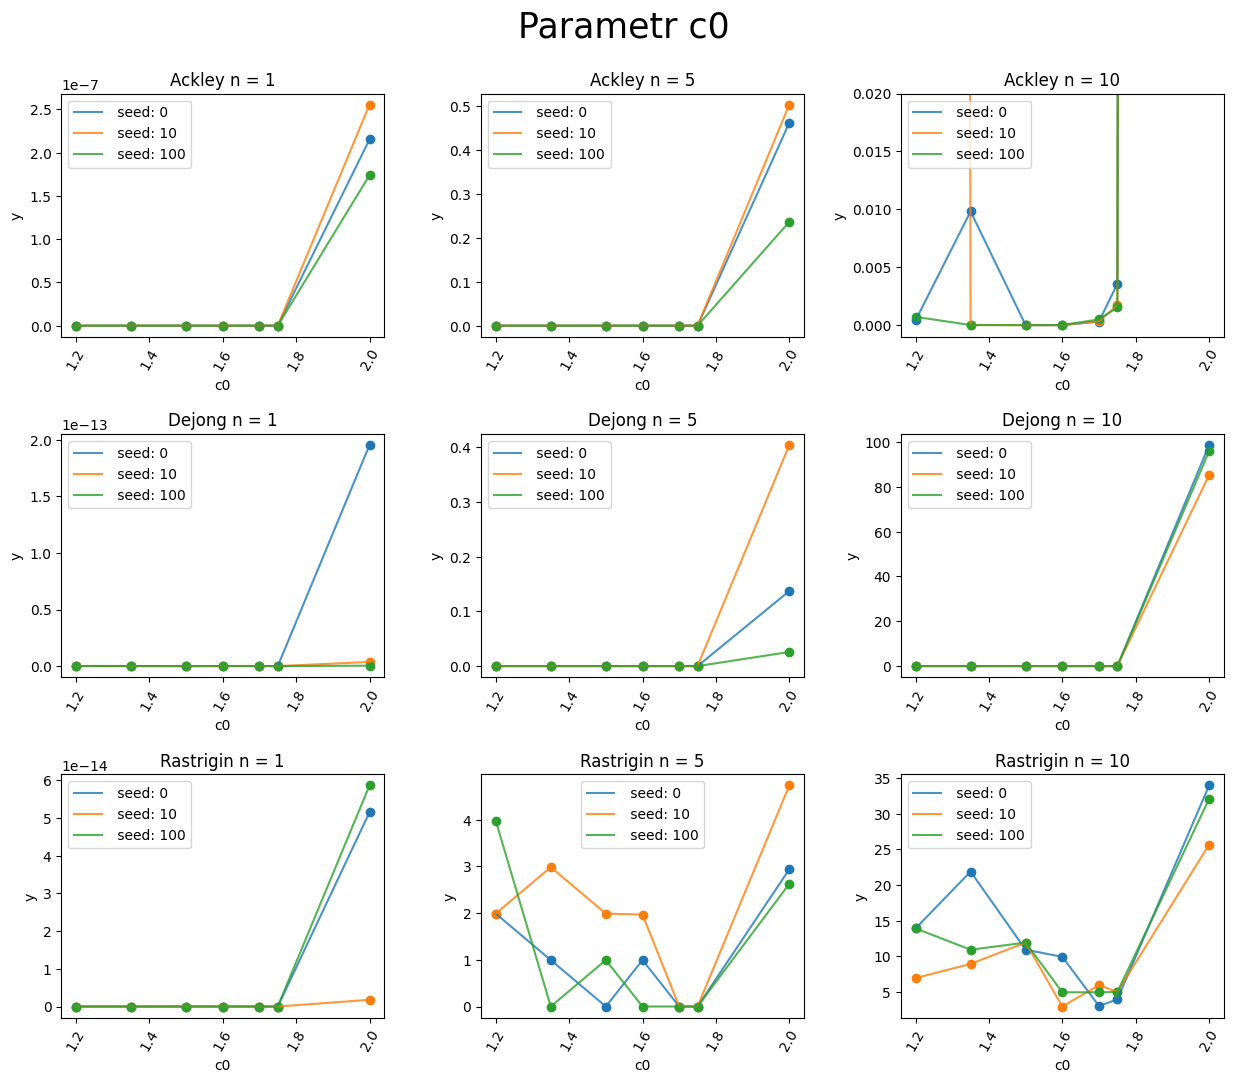

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

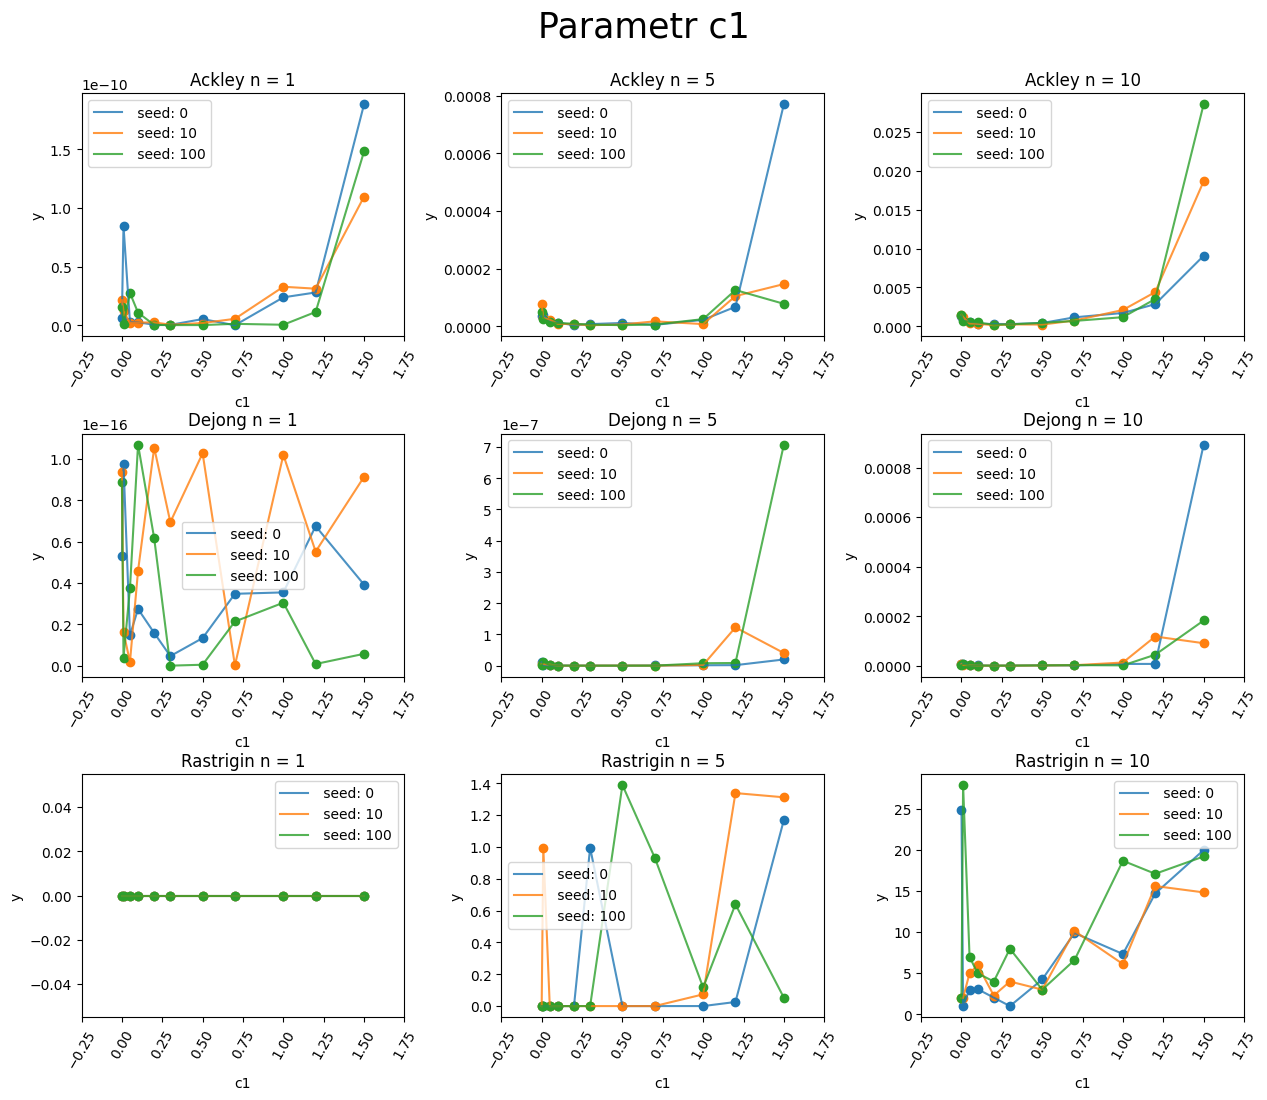

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

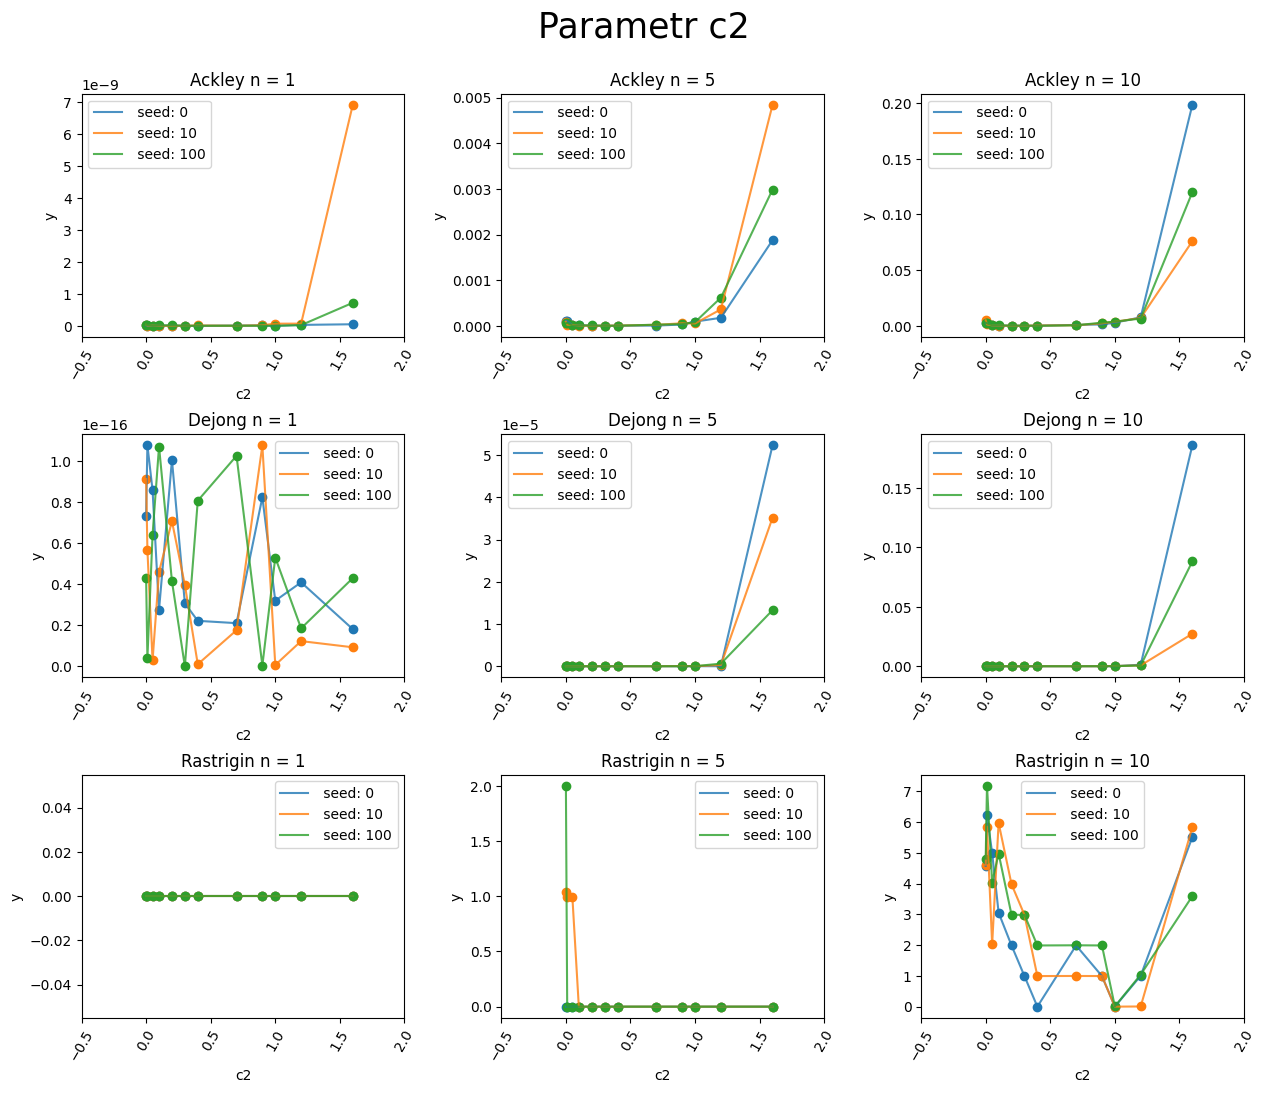

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

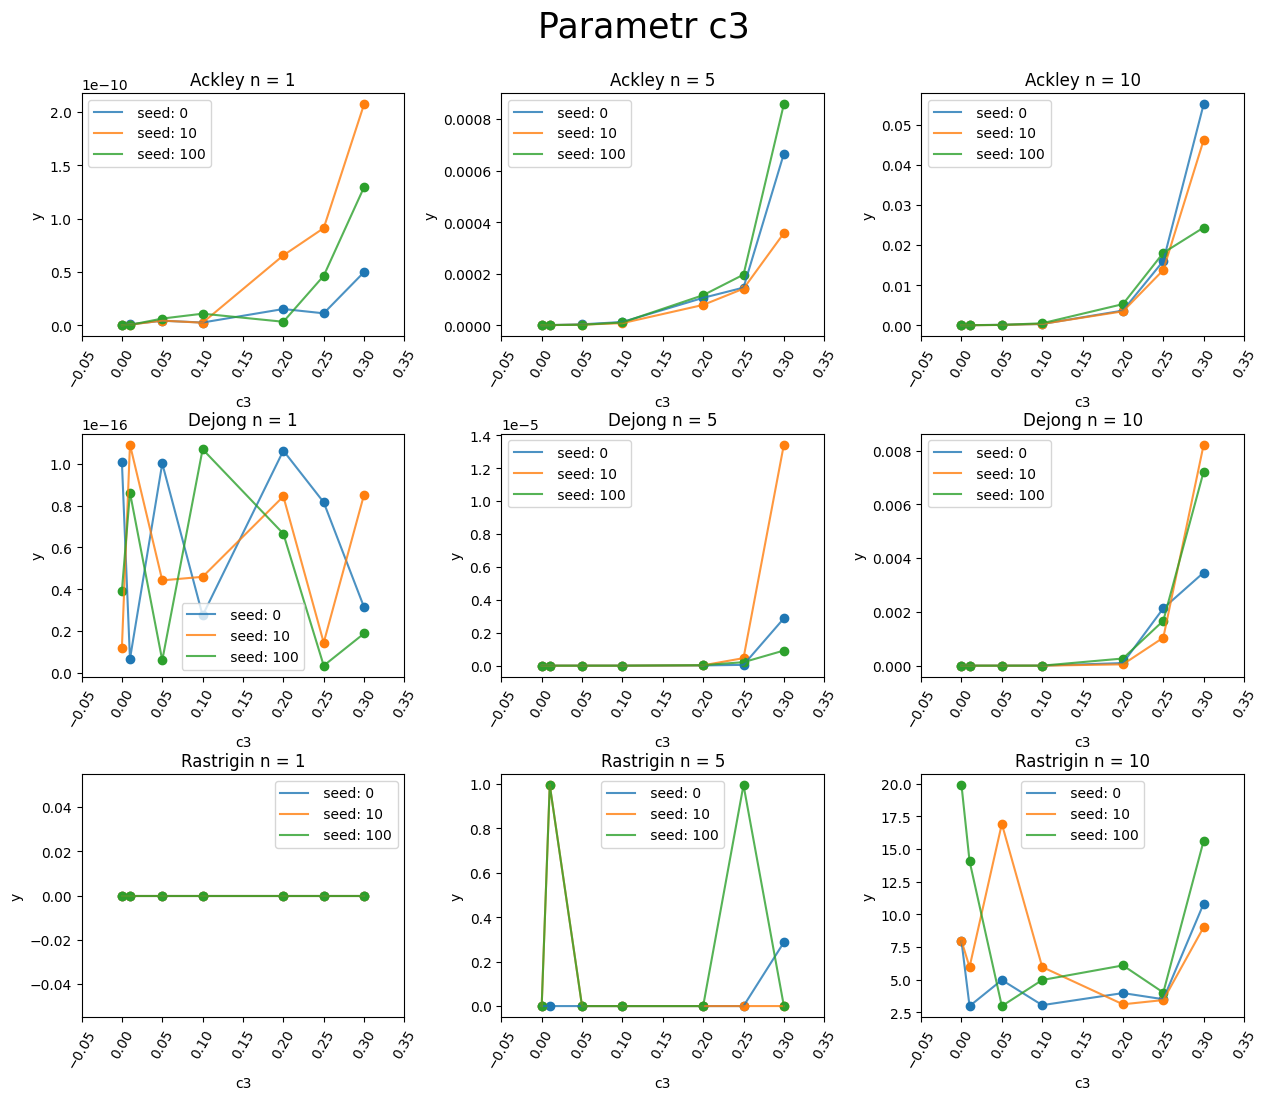

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

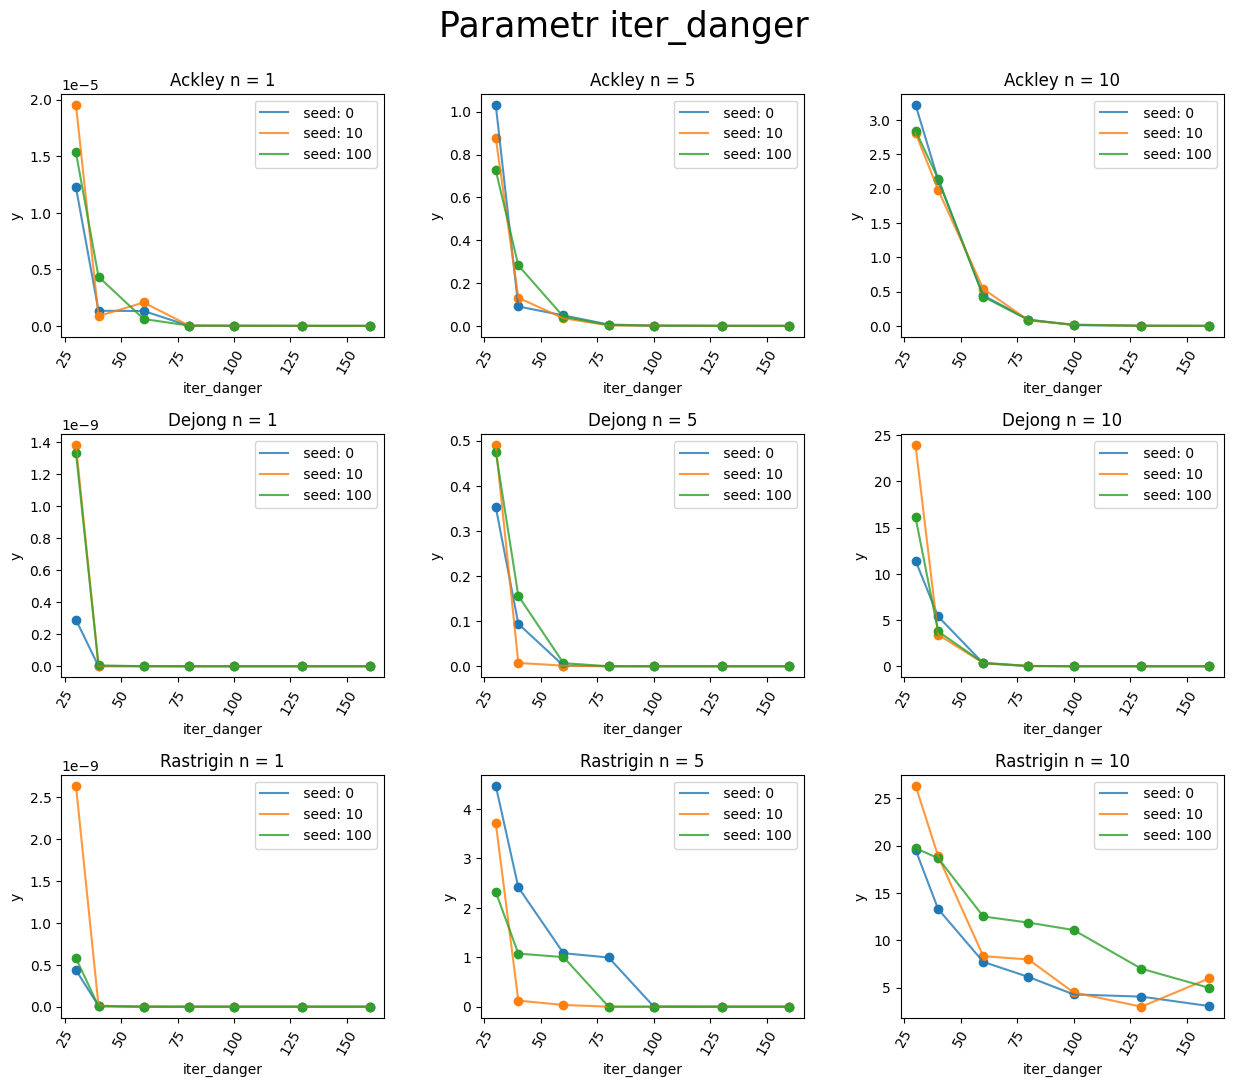

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

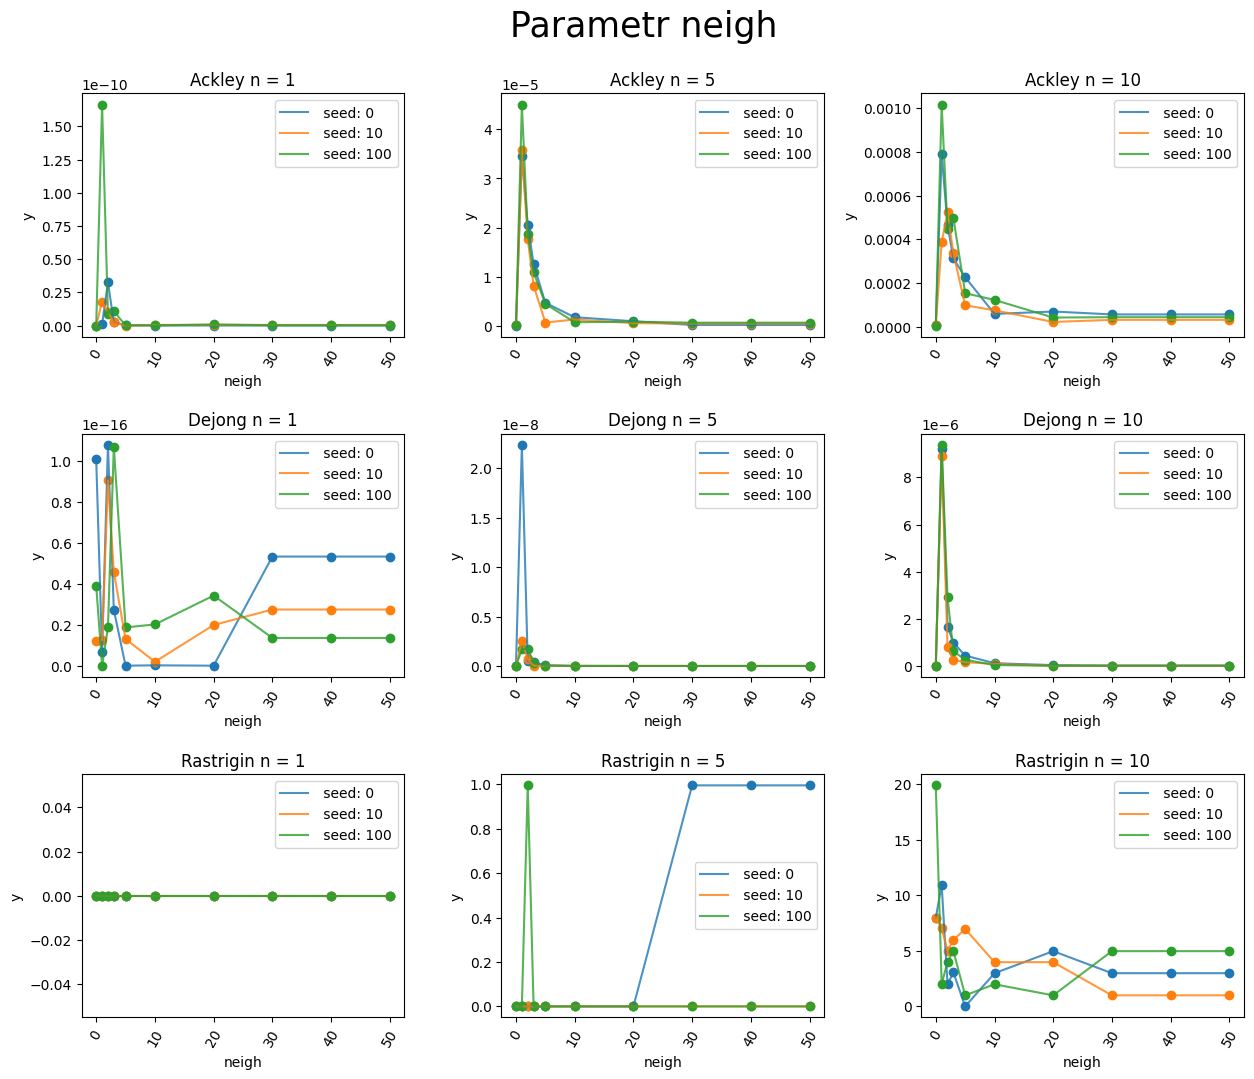

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

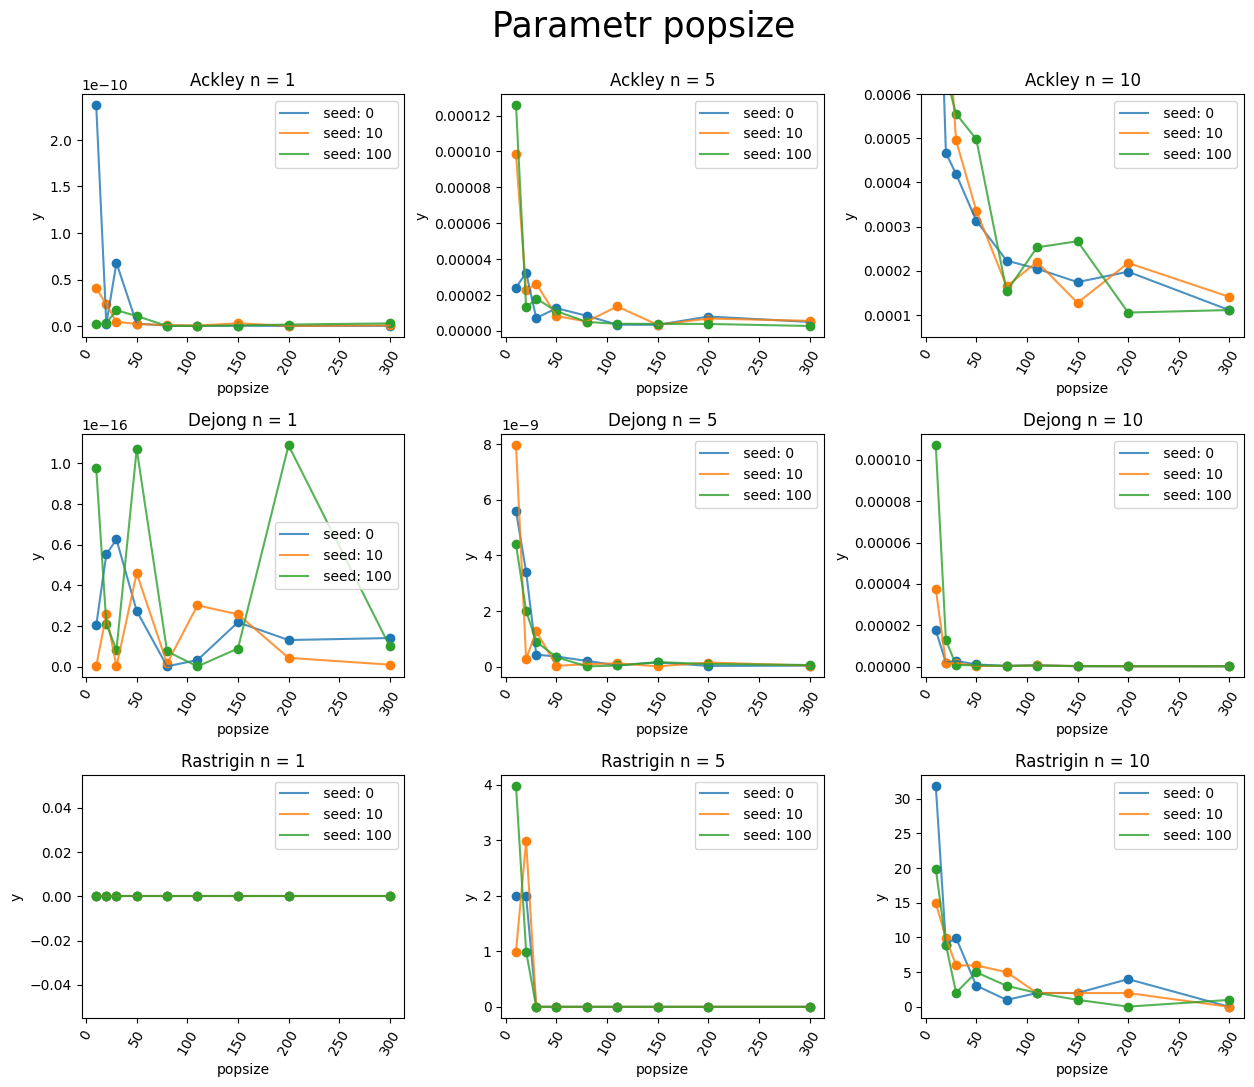

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\2652051039.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

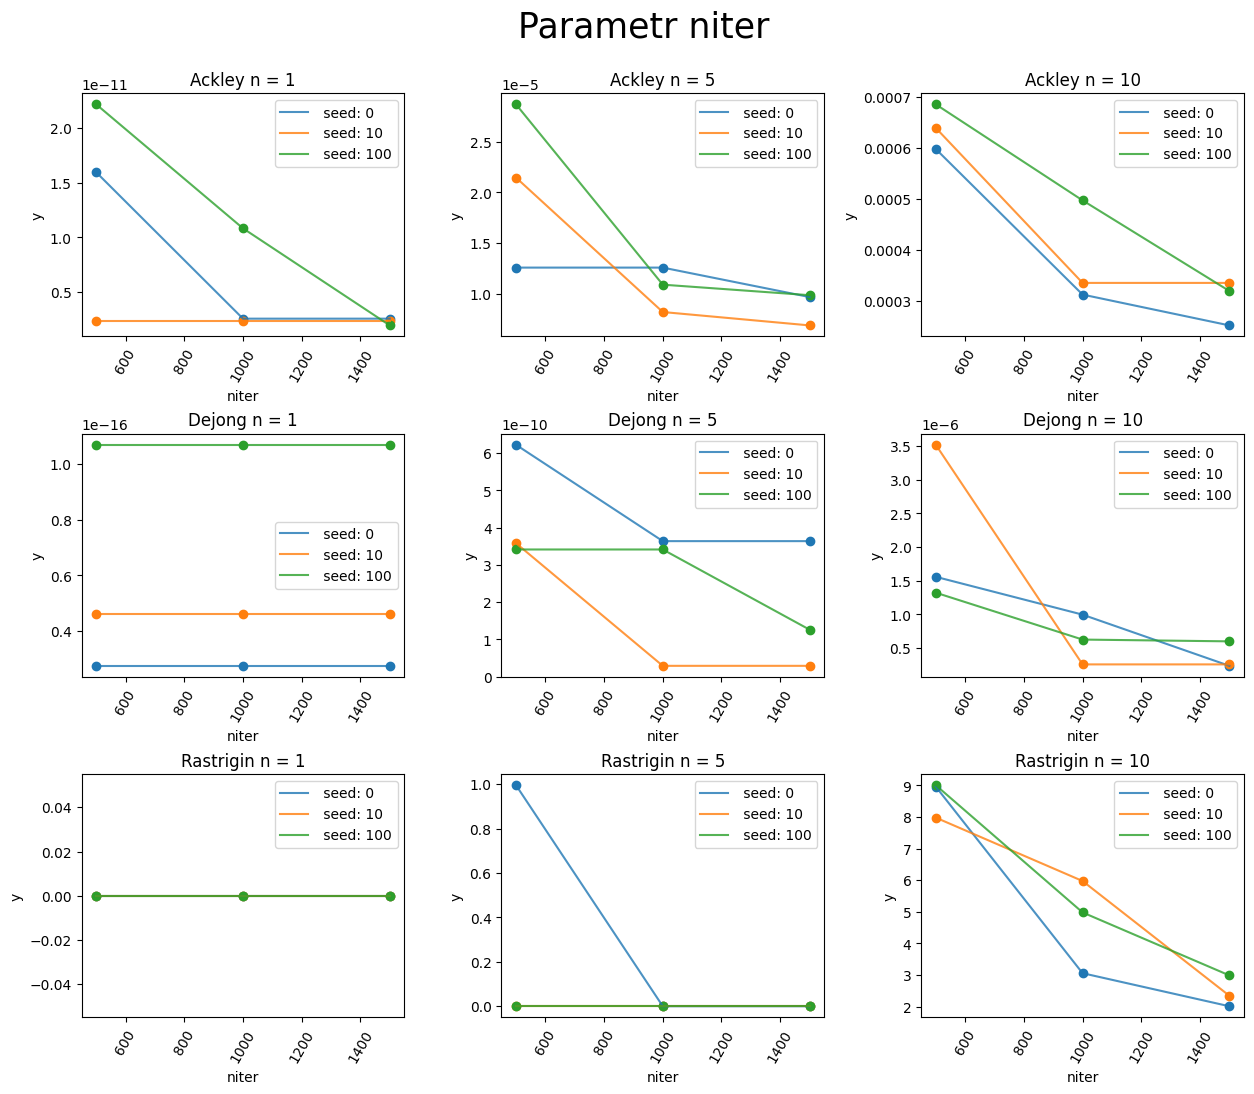

In [82]:
df = None
for fname in ['ackley','dejong','rastrigin']:
    for n in [1, 5, 10]:
        filename = f"./CW 10 PSO_OPT/results/{fname}/report_PSO_auto_{n}.txt"
        try:
            tdf = load_file(filename, fname, n)
        except Exception as e:
            print(e)
            continue
        if (type(df) == type(None)):
            df = tdf
        else:
            df = pd.concat([df, tdf])
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    plot_1(df,param)

C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\3226820598.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\3226820598.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\3226820598.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\3226820598.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=

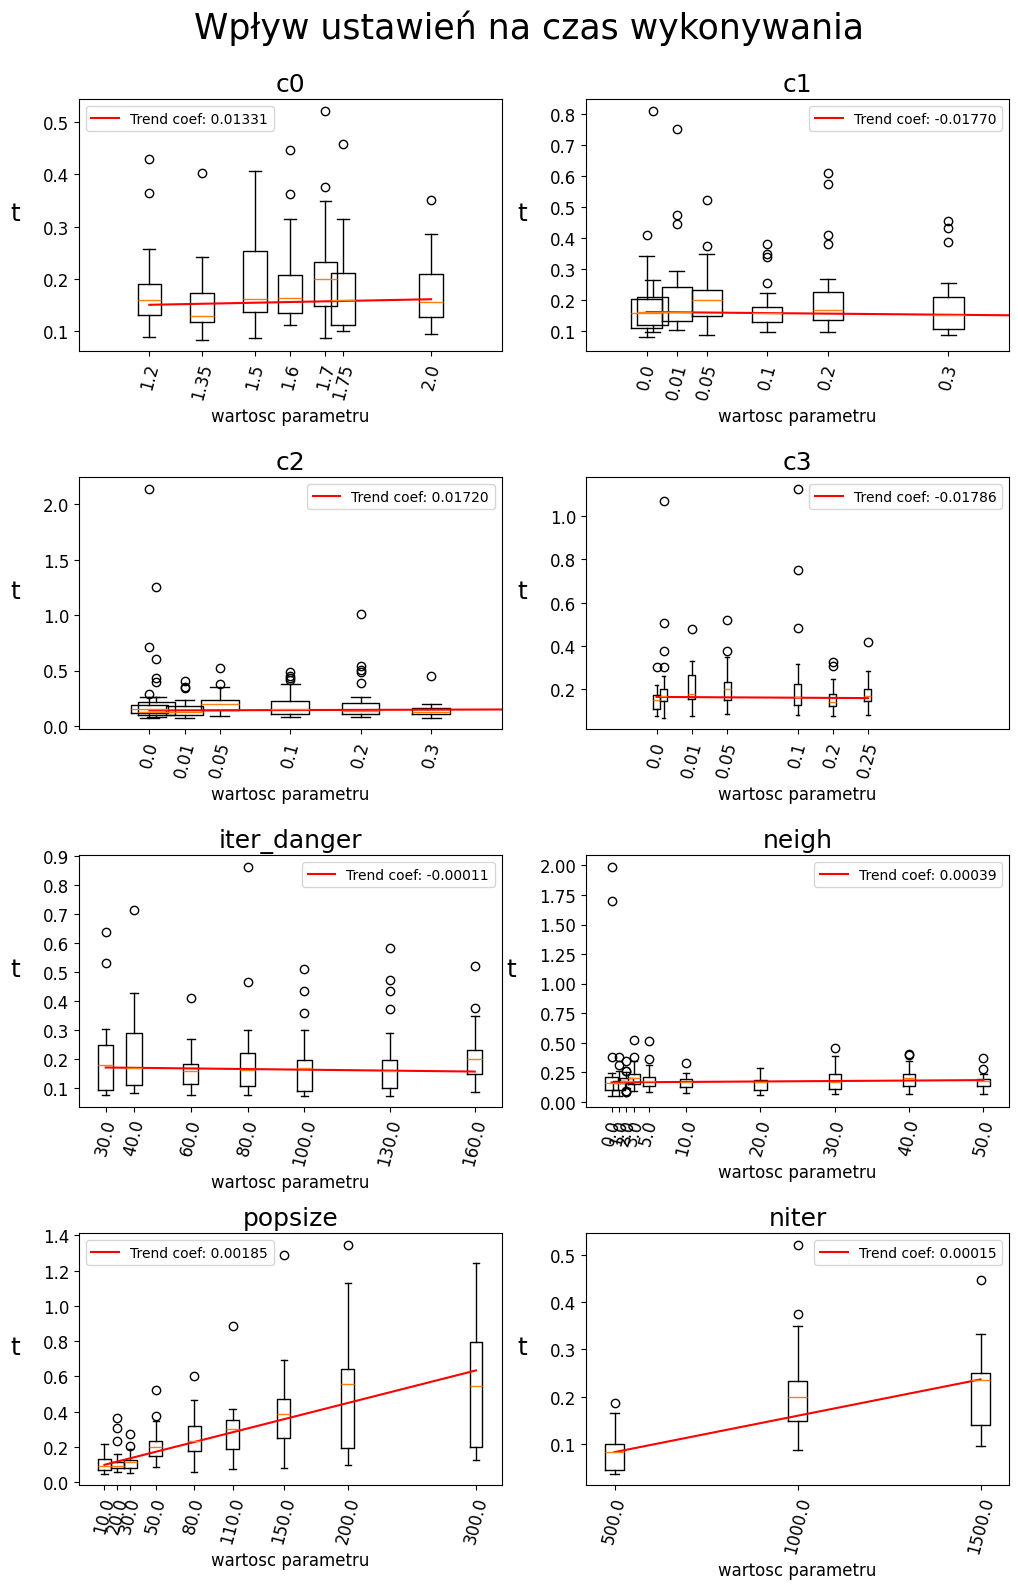

In [83]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    dfltdf = df.loc[[0,1,2]]
    tdf = pd.concat([paramdf, dfltdf])
    w = max(np.unique(tdf[param]))/30
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)
    if param in ['c1','c2','c3']:
                    t = ax.get_xticks()
                    t = t[t!=0.01]
                    ax.set_xticks(t)
    match param:
        case 'c0':
            ax.set_xlim([1,2.2])
        case 'c1':
            ax.set_xlim([-0.1,0.6])
        case 'c2':
            ax.set_xlim([-0.1,.5])
        case 'c3':
            ax.set_xlim([-0.1,.5])
    
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize=12)


y = 't'
fig, axs = plt.subplots(4,2, figsize=(12,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    i += 1
    axid1 = int(i/2)
    axid2 = i%2
    plot_single(df, param, axs[axid1, axid2],y)
    gb = df.groupby(by=param)
    gbdf = gb.median(numeric_only=True)[y]
    coef = np.polyfit(gbdf.index, gbdf.values, 1)
    trend = np.poly1d(coef)
    axs[axid1,axid2].plot(gbdf.index, trend(gbdf.index), color='red', label=f'Trend coef: {coef[0]:.5f}')
    axs[axid1,axid2].legend()
fig.suptitle("Wpływ ustawień na czas wykonywania", fontsize=25, y=0.93)
fig.savefig('./plots/time.png', bbox_inches='tight')


it       999.000000
ybest      2.984877
sum             NaN
ycurr    268.899000
Name: 999, dtype: float64


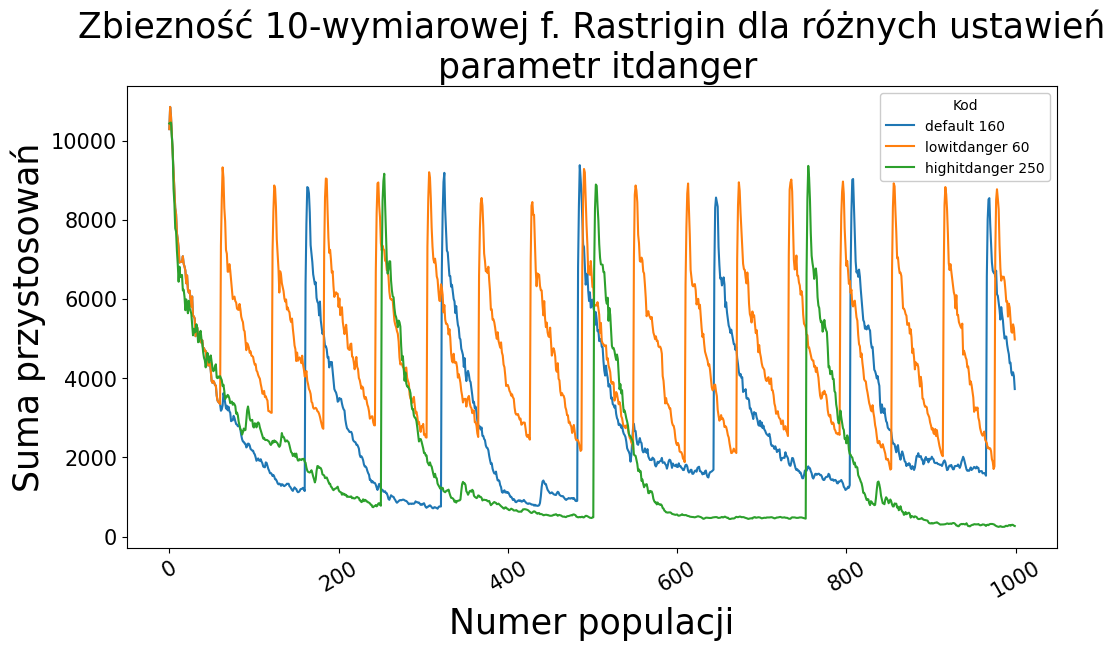

In [77]:
def init_df(n):
    columns = ['it','ybest','sum']
    return pd.DataFrame(columns=columns)
def proc_line(df, line, i=0):
    s = line.split(',')
    s.pop()
    #s = [float(x) for x in s]
    try:
        x = [s[0],s[1],s[2]]    
        return x
    except Exception as e:
        pass
def load_log(filename):
    with open(filename) as f:
        data = f.readlines()
        df = init_df(n)
        s = [proc_line(df,line, i) for i, line in enumerate(data)]
        
        df['it'] = [x[0] for x in s if x != None]
        df['ybest'] = [x[1] for x in s if x != None]
        df['ycurr'] = [x[2] for x in s if x != None]
        df.drop(df.tail(1).index,inplace=True)
        df = df.astype(float)
    return df

funcname = 'Rastrigin'
n=10
fig = plt.figure(figsize=(12,6))
step = 1

lognames = ['default','lowc0','highc0 1.95','lowc1','highc1 0.1','lowc2','highc2 0.4','lowc3','highc3 0.35','lowitdanger','highitdanger 250']
labels = ['default 1.7','lowc0 1.2','highc0 1.95']
#labels = ['default 0.1','lowc1 0.05','highc1 0.1']
#labels = ['default 0.1','lowc2 0.01','highc2 0.4']
#labels = ['default 0.1','lowc3 0.01','highc3 0.35']
labels = ['default 160','lowitdanger 60','highitdanger 250']

lognames = [x.split(' ')[0] for x in labels]
param = labels[1].split(' ')[0].split('low')[1]
for logname,label in zip(lognames, labels):
    #plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ybest'],label='ybest')
    df = load_log(f'./CW 10 PSO_OPT/results/logs/log_{logname}.txt')
    plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'],label=label)
    plt.title(f'Zbiezność {n}-wymiarowej f. {funcname} dla różnych ustawień\n parametr {param}', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Suma przystosowań', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])
fig.savefig(f'./plots/{param}conv.png',bbox_inches='tight')

plt.show()

it        999.000
ybest       2.985
sum           NaN
ycurr    7916.236
Name: 999, dtype: float64


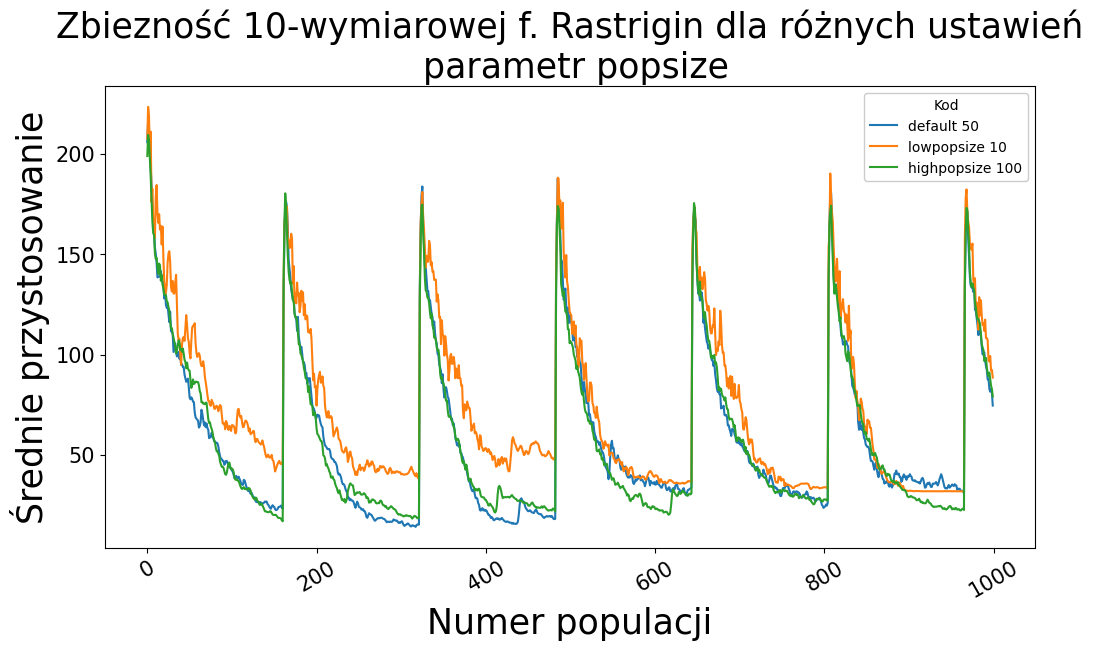

In [76]:
fig = plt.figure(figsize=(12,6))
step = 1

n = 10
labels = ['default 50','lowpopsize 10','highpopsize 100']
lognames = [x.split(' ')[0] for x in labels]
param = labels[1].split(' ')[0].split('low')[1]
for logname,label in zip(lognames, labels):
    npop = int(label.split(' ')[1])
    df = load_log(f'./CW 10 PSO_OPT/results/logs/log_{logname}.txt')
    yval = df.iloc[::step]['ycurr'].values/npop
    plt.plot(df.iloc[::step]['it'], yval,label=label)
    plt.title(f'Zbiezność {n}-wymiarowej f. {funcname} dla różnych ustawień\n parametr {param}', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Średnie przystosowanie', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])

fig.savefig(f'./plots/{param}conv.png',bbox_inches='tight')
plt.show()

In [ ]:
#6m runtime
#grid
#sprobowac wczytac z csv - moze szybciej :)
#wylaczone dla ulatwienia

if (False):
    df = None
    fname = 'rastrigin'
    n = 10
    for p in [1, 2]:
            filename = f"./CW 10 PSO_OPT/results/grid/report_PSO_auto_part{p}.txt"
            try:
                tdf = load_file(filename, fname, n)
            except Exception as e:
                print(e)
                continue
            if (type(df) == type(None)):
                df = tdf
            else:
                df = pd.concat([df, tdf])
    df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
    dflt = df.head(1)
    df = df.reset_index(drop=True)

In [98]:
df = pd.read_csv("./griddata.csv", index_col=0)
df.head(1)

,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
0,rastrigin,10,0.07,0.072,9660.0,10010.0,1.0,0.0,0.3,0.0,50.0,0.0,10.0,1000.0,0.0,24.87388,0.994946,-3.979768,-0.994973,0.994958,-0.994971,-0.994955,0.994959,0.994977,-0.994962,0.994933,rastrigin10


C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\1027852503.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\1027852503.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\1027852503.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_7492\1027852503.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=

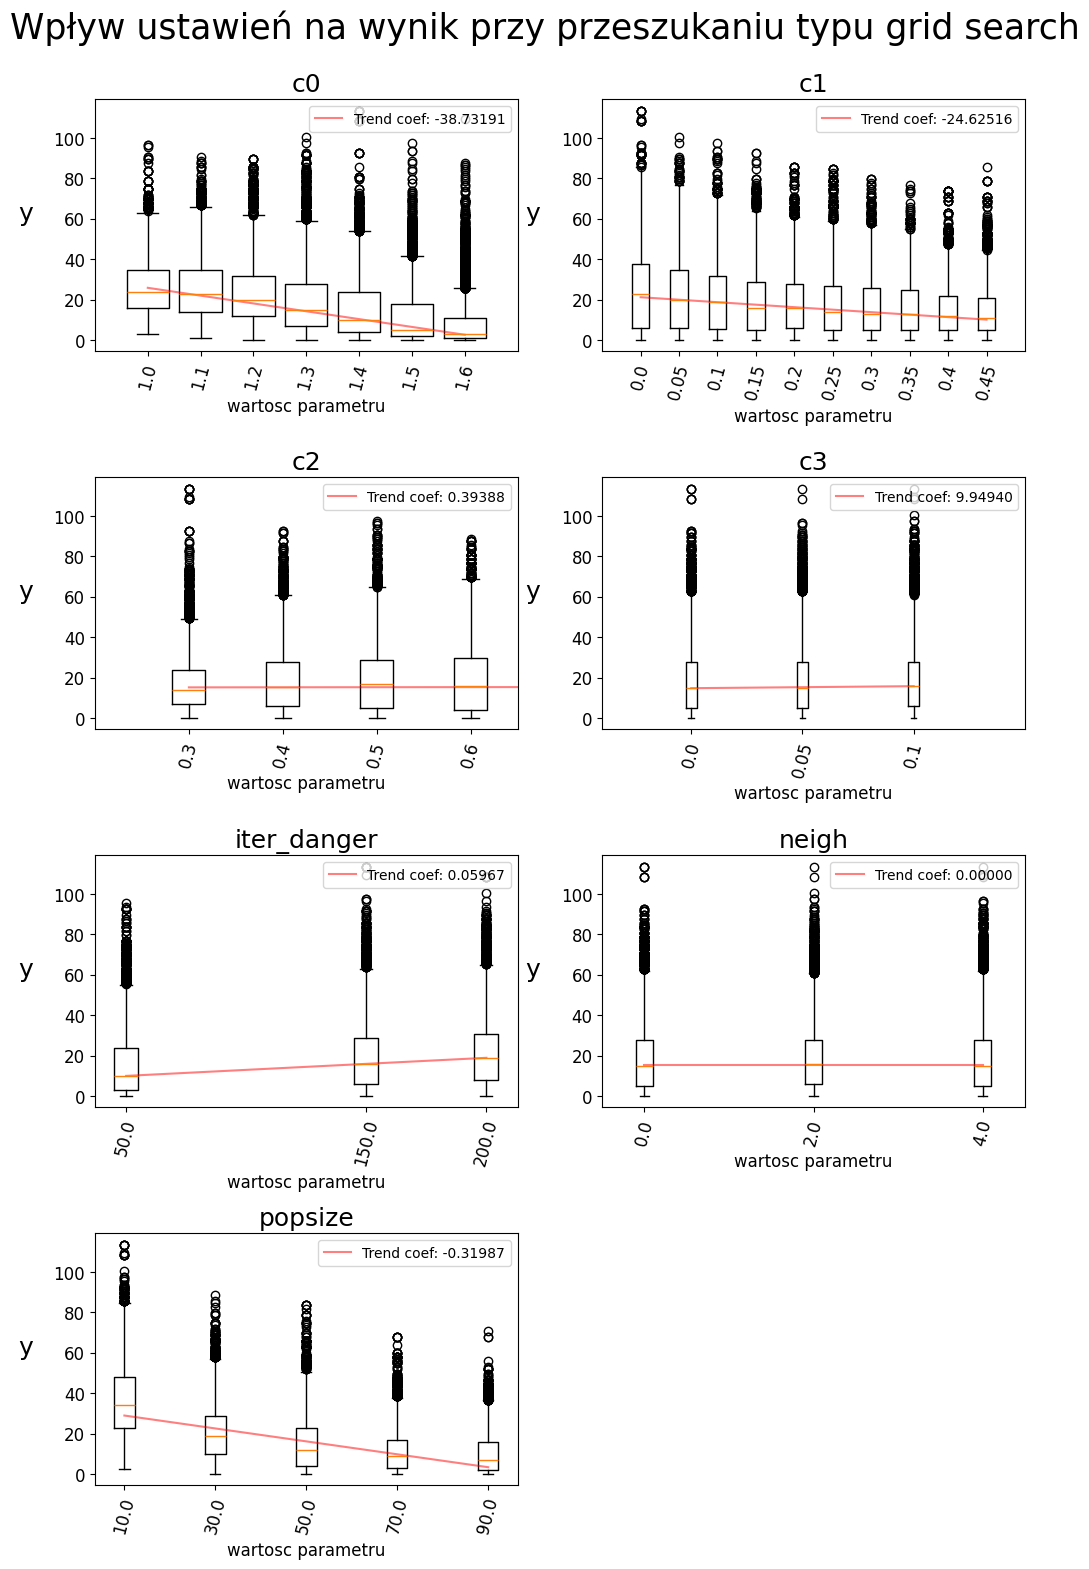

In [108]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    #dfltdf = df.loc[[0]] #only one default
    #tdf = pd.concat([paramdf])
    tdf = df.sort_values(by=param)
    w = max(np.unique(tdf[param]))/20
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)
    if param in ['c1','c2','c3']:
                    t = ax.get_xticks()
                    t = t[t!=0.01]
                    ax.set_xticks(t)
    match param:
        case 'c0':
            ax.set_xlim([.9,1.7])
        case 'c1':
            ax.set_xlim([-0.05,0.5])
        case 'c2':
            ax.set_xlim([0.2,.65])
        case 'c3':
            ax.set_xlim([-0.04,.15])
    
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize=12)


y = 'y'
fig, axs = plt.subplots(4,2, figsize=(12,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    i += 1
    axid1 = int(i/2)
    axid2 = i%2
    plot_single(df, param, axs[axid1, axid2],y)
    gb = df.groupby(by=param)
    gbdf = gb.median(numeric_only=True)[y]
    coef = np.polyfit(gbdf.index, gbdf.values, 1)
    trend = np.poly1d(coef)
    axs[axid1,axid2].plot(gbdf.index, trend(gbdf.index), color='red', label=f'Trend coef: {coef[0]:.5f}', alpha=0.5)
    axs[axid1,axid2].legend(loc='upper right')
axs[3,1].remove()
fig.suptitle("Wpływ ustawień na wynik przy przeszukaniu typu grid search", fontsize=25, y=0.93)
fig.savefig('./plots/grid.png', bbox_inches='tight')


In [30]:
for param in ['c0','c1','c2','c3','iter_danger','neigh','popsize','niter']:
    gb = df.groupby(by=param)
    gbdf = gb.min(numeric_only=True)[y]
    print(param, np.max(gbdf), np.median(gbdf))
    #display(gbdf)

c0 2.984877 8.001848e-09
c1 1.082299e-10 7.105425e-15
c2 0.0 0.0
c3 0.0 0.0
iter_danger 8.001848e-09 0.0
neigh 0.0 0.0
popsize 2.685423 7.958079e-13
niter 0.0 0.0


In [66]:
#zaklada ze df to wyniki pojedynczych przeszukan wczytanych duzo wczesniej
pd.set_option('display.max_columns', None)
gb = df.groupby(by='g')
gbdf = gb.min(numeric_only=True)
for g, val in zip(gbdf.index, gbdf['y'].values):
    print(g,val, df[(df['g']==g) & (df['y']==val)].shape[0])
    display(df[(df['g']==g) & (df['y']==val)].head(1))

ackley1 4.440892e-16 9


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
9,ackley,1,0.013,0.087,7700.0,50050.0,1.5,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,0.0,4.440892e-16,-1.884380e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1


ackley10 5.817672e-08 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
9,ackley,10,0.387,0.407,48350.0,50050.0,1.5,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,0.0,5.817672e-08,9.218503e-09,-2.434317e-09,-5.096293e-09,8.462212e-09,1.151068e-08,-8.778449e-09,-1.810554e-08,3.163765e-09,2.851008e-08,-2.380424e-08,ackley10


ackley5 3.996803e-15 2


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
16,ackley,5,0.117,0.122,48300.0,50050.0,1.2,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,10.0,3.996803e-15,-1.687884e-17,8.850024e-16,1.406659e-15,-2.337156e-15,1.019806e-15,NaN,NaN,NaN,NaN,NaN,ackley5


dejong1 6.559724e-21 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
59,dejong,1,0.023,0.105,5350.0,50050.0,1.7,0.1,0.3,0.1,160.0,3.0,50.0,1000.0,100.0,6.559724e-21,-8.099213e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dejong1


dejong10 1.076982e-16 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
14,dejong,10,0.199,0.207,48000.0,50050.0,1.35,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,100.0,1.076982e-16,-2.680644e-09,2.165003e-09,2.232622e-09,-1.761639e-09,1.062765e-09,5.531053e-09,4.519874e-09,-3.817064e-09,3.679431e-09,-2.734536e-09,dejong10


dejong5 5.592148e-17 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
13,dejong,5,0.04,0.123,14800.0,50050.0,1.35,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,10.0,5.592148e-17,-4.321541e-09,1.713034e-09,2.623392e-09,1.089977e-09,5.122601e-09,NaN,NaN,NaN,NaN,NaN,dejong5


rastrigin1 0.0 163


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
0,rastrigin,1,0.076,0.376,6600.0,50050.0,1.7,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,0.0,0.0,-7.032797e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rastrigin1


rastrigin10 4.432029e-07 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
169,rastrigin,10,0.77,0.797,290100.0,300300.0,1.7,0.1,0.1,0.1,160.0,3.0,300.0,1000.0,10.0,4.432029e-07,-0.000016,0.000011,-0.000025,-0.000008,0.000024,-0.000012,0.000004,0.000002,0.000002,-0.00002,rastrigin10


rastrigin5 0.0 1


,fname,n,t_opt,t,eval_opt,eval,c0,c1,c2,c3,iter_danger,neigh,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
14,rastrigin,5,0.121,0.13,46800.0,50050.0,1.35,0.1,0.1,0.1,160.0,3.0,50.0,1000.0,100.0,0.0,-1.787959e-09,2.594505e-09,2.072576e-10,-8.286493e-10,-1.523248e-09,NaN,NaN,NaN,NaN,NaN,rastrigin5
